In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv('cars.csv')

In [6]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [7]:
df.isnull().sum()


brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [28]:
df[['fuel', 'owner']]

,fuel,owner
0,0.0,0.0
1,0.0,1.0
2,1.0,2.0
3,0.0,0.0
4,1.0,0.0
...,...,...
8123,1.0,0.0
8124,0.0,3.0
8125,0.0,0.0
8126,0.0,0.0


In [29]:
df['fuel'].unique()

array([0., 1., 2., 3.])

In [30]:
df['owner'].unique()

array([0., 1., 2., 3., 4.])

In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Diesel', 'Petrol', 'LPG', 'CNG'],['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['fuel', 'owner']]= oe.fit_transform(df[['fuel', 'owner']])

ValueError: could not convert string to float: 'Diesel'

In [32]:
oe.categories_

[]

In [15]:
df[['fuel', 'owner']]

,fuel,owner
0,0.0,0.0
1,0.0,1.0
2,1.0,2.0
3,0.0,0.0
4,1.0,0.0
...,...,...
8123,1.0,0.0
8124,0.0,3.0
8125,0.0,0.0
8126,0.0,0.0


In [16]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,0.0,0.0,450000
1,Skoda,120000,0.0,1.0,370000
2,Honda,140000,1.0,2.0,158000
3,Hyundai,127000,0.0,0.0,225000
4,Maruti,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,1.0,0.0,320000
8124,Hyundai,119000,0.0,3.0,135000
8125,Maruti,120000,0.0,0.0,382000
8126,Tata,25000,0.0,0.0,290000


In [17]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [18]:
dummies= pd.get_dummies(df, columns = ['brand'])
dummies

,km_driven,fuel,owner,selling_price,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,145500,0.0,0.0,450000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0.0,1.0,370000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,1.0,2.0,158000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,0.0,0.0,225000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,1.0,0.0,130000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,1.0,0.0,320000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,119000,0.0,3.0,135000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,120000,0.0,0.0,382000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,25000,0.0,0.0,290000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,0.0,0.0,450000
1,Skoda,120000,0.0,1.0,370000
2,Honda,140000,1.0,2.0,158000
3,Hyundai,127000,0.0,0.0,225000
4,Maruti,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,1.0,0.0,320000
8124,Hyundai,119000,0.0,3.0,135000
8125,Maruti,120000,0.0,0.0,382000
8126,Tata,25000,0.0,0.0,290000


In [22]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [33]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,0.0,0.0,450000
1,Skoda,120000,0.0,1.0,370000
2,Honda,140000,1.0,2.0,158000
3,Hyundai,127000,0.0,0.0,225000
4,Maruti,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,1.0,0.0,320000
8124,Hyundai,119000,0.0,3.0,135000
8125,Maruti,120000,0.0,0.0,382000
8126,Tata,25000,0.0,0.0,290000


In [34]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [35]:
dummies= pd.get_dummies(df, columns = ['brand'])
dummies

,km_driven,fuel,owner,selling_price,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,145500,0.0,0.0,450000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0.0,1.0,370000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,1.0,2.0,158000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,0.0,0.0,225000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,1.0,0.0,130000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,1.0,0.0,320000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,119000,0.0,3.0,135000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,120000,0.0,0.0,382000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,25000,0.0,0.0,290000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#box transformation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [38]:
X = df.iloc[:,1:4]
y = df.iloc[:,-1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

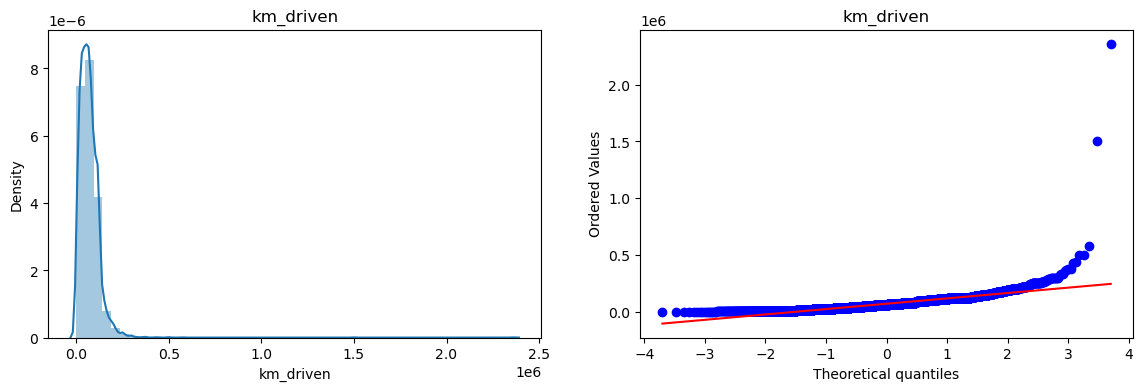

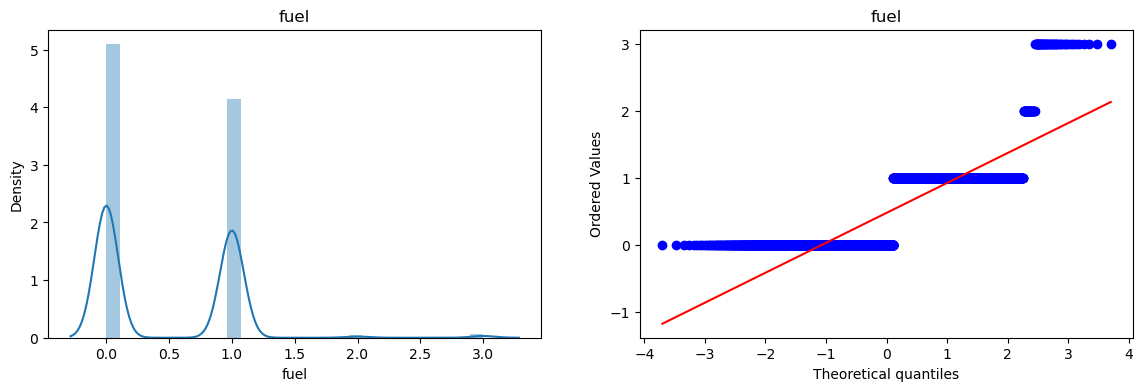

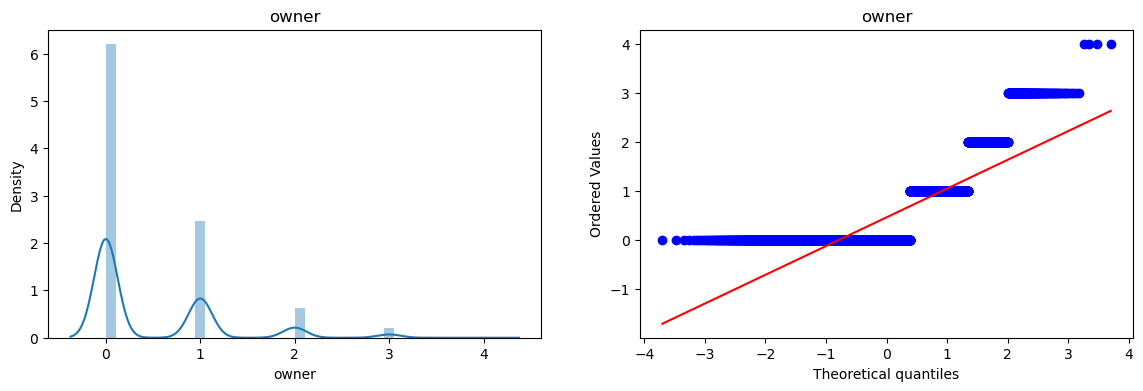

In [41]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.14220624505564683

In [47]:
#log transformation
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
X = df.iloc[:,1:4]
y = df.iloc[:,-1]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

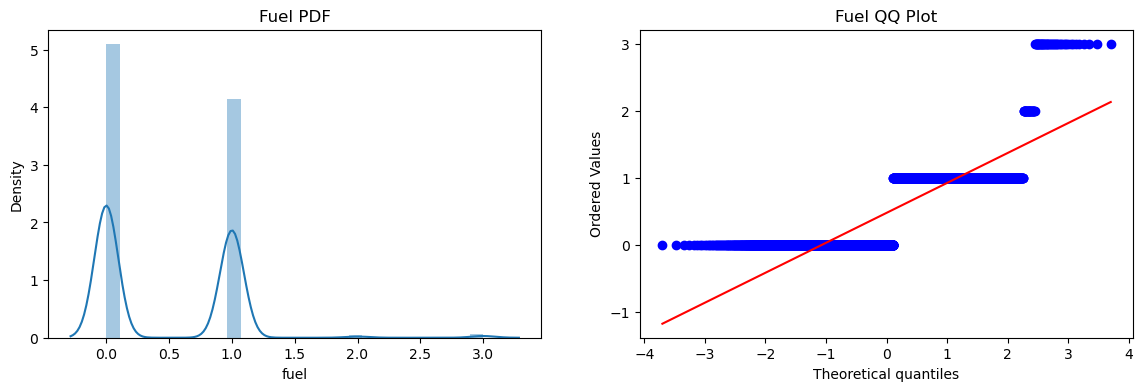

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fuel'])
plt.title('Fuel PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['fuel'], dist="norm", plot=plt)
plt.title('Fuel QQ Plot')

plt.show()

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

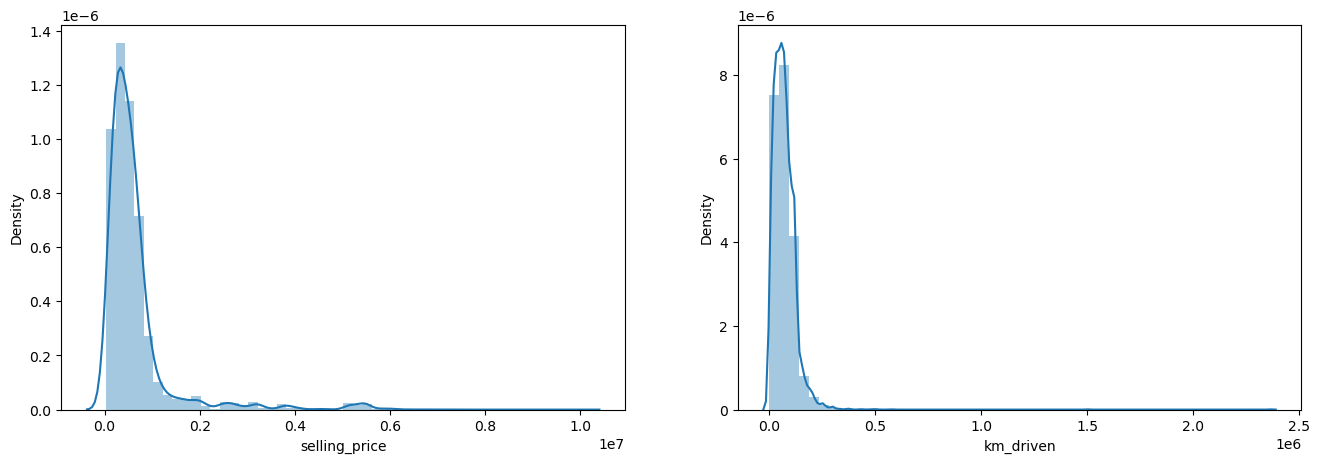

In [56]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
sns.distplot(df['km_driven'])

plt.show()

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
df['selling_price'].skew()

4.193533440675855

In [58]:
print("Mean value of cgpa",df['selling_price'].mean())
print("Std value of cgpa",df['selling_price'].std())
print("Min value of cgpa",df['selling_price'].min())
print("Max value of cgpa",df['selling_price'].max())

Mean value of cgpa 638271.8077017716
Std value of cgpa 806253.4035082331
Min value of cgpa 29999
Max value of cgpa 10000000


In [61]:
# Finding the boundary values
upper_limit= df['selling_price'].mean() + 3*df['selling_price'].std()
lower_limit= df['selling_price'].mean() - 3*df['selling_price'].std()

In [60]:
scaler.mean_

array([7.00509832e+04, 4.73700400e-01, 4.59704706e-01])

In [62]:
outlier = df[(df['selling_price'] > upper_limit) | (df['selling_price'] < lower_limit)]
outlier

,brand,km_driven,fuel,owner,selling_price
131,Audi,31800,0.0,0.0,3975000
132,Lexus,20000,1.0,0.0,5150000
133,Jaguar,45000,0.0,0.0,3200000
134,Jeep,17000,1.0,0.0,4100000
135,Land,21000,0.0,0.0,4500000
...,...,...,...,...,...
7860,Jaguar,45000,0.0,0.0,3200000
7862,Volvo,20000,0.0,0.0,3800000
7872,BMW,7500,0.0,0.0,5400000
7873,BMW,8500,0.0,0.0,5500000


In [63]:
new_df = df[(df['selling_price'] < upper_limit) & (df['selling_price'] > lower_limit)]
new_df.shape

(7899, 5)

In [64]:
df['selling_price_zscore'] = (df['selling_price'] - df['selling_price'].mean())/df['selling_price'].std()

In [65]:
outlier = df[(df['selling_price_zscore'] > 3) | (df['selling_price_zscore'] < -3)]
outlier

,brand,km_driven,fuel,owner,selling_price,selling_price_zscore
131,Audi,31800,0.0,0.0,3975000,4.138560
132,Lexus,20000,1.0,0.0,5150000,5.595918
133,Jaguar,45000,0.0,0.0,3200000,3.177324
134,Jeep,17000,1.0,0.0,4100000,4.293598
135,Land,21000,0.0,0.0,4500000,4.789720
...,...,...,...,...,...,...
7860,Jaguar,45000,0.0,0.0,3200000,3.177324
7862,Volvo,20000,0.0,0.0,3800000,3.921507
7872,BMW,7500,0.0,0.0,5400000,5.905995
7873,BMW,8500,0.0,0.0,5500000,6.030025


In [66]:
new_df1 = df[(df['selling_price_zscore'] < 3 ) & (df['selling_price_zscore'] > -3)]
new_df1.shape

(7899, 6)

<Axes: >

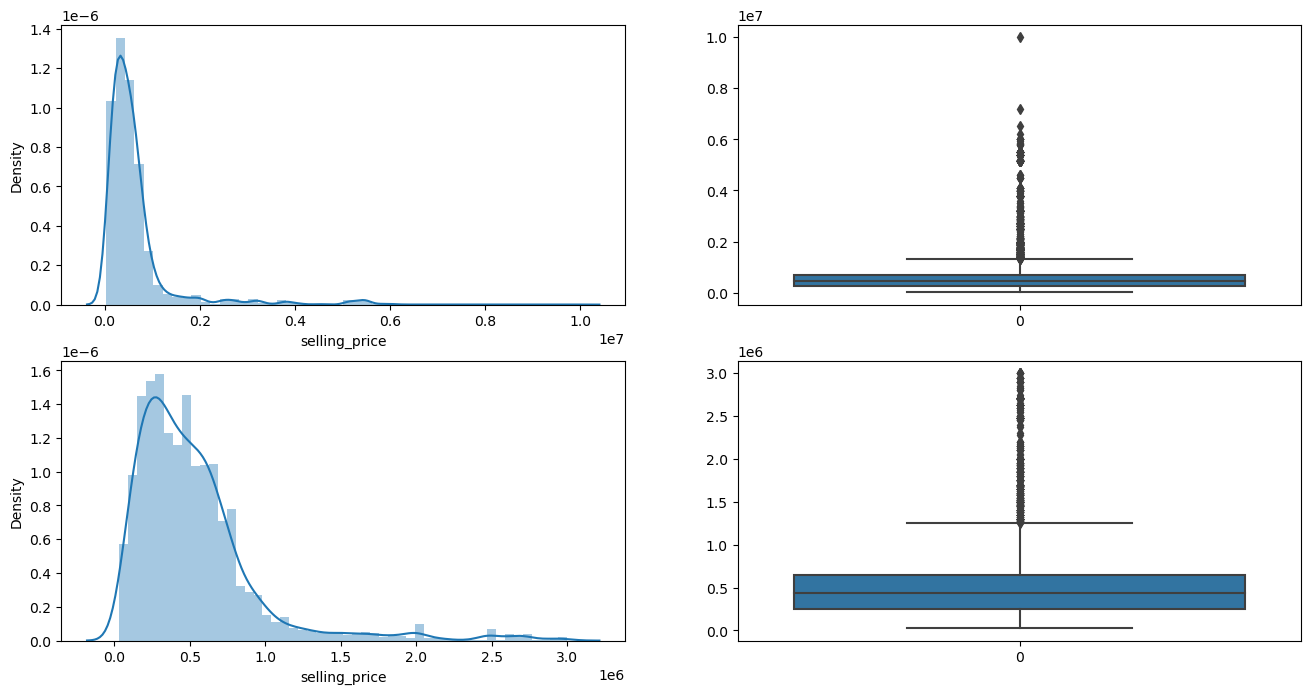

In [67]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])

plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])

plt.subplot(2,2,3)
sns.distplot(new_df1['selling_price'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['selling_price'])

In [68]:
#np.where(condition, true, false)
df2=df.copy()
df2['selling_price'] = np.where(
    df2['selling_price']>upper_limit,
    upper_limit,
    np.where(
        df2['selling_price']<lower_limit,
        lower_limit,
        df2['selling_price']
    )
)

<Axes: >

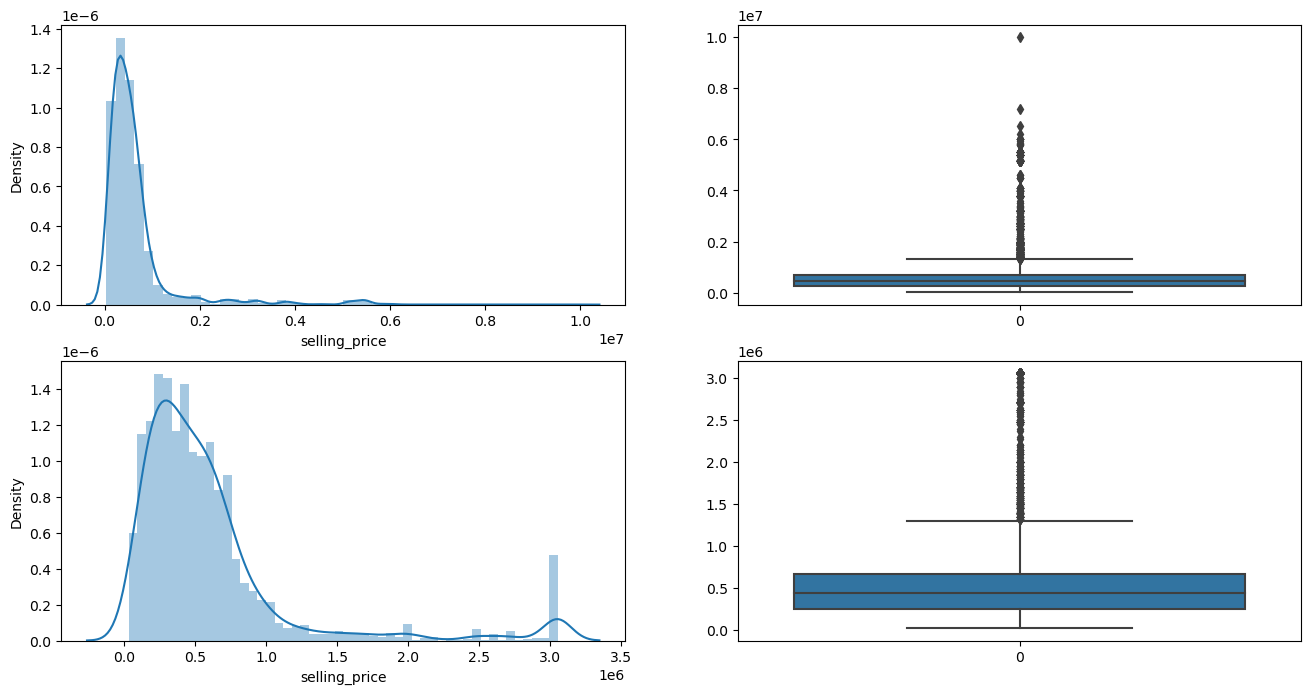

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])

plt.subplot(2,2,2)
sns.boxplot(df['selling_price'])

plt.subplot(2,2,3)
sns.distplot(df2['selling_price'])

plt.subplot(2,2,4)
sns.boxplot(df2['selling_price'])

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
scaler.mean_

array([7.00509832e+04, 4.73700400e-01, 4.59704706e-01])

In [72]:
X_train

,km_driven,fuel,owner
6518,2560,1.0,0.0
6144,80000,1.0,1.0
6381,150000,0.0,3.0
438,120000,0.0,1.0
5939,25000,1.0,0.0
...,...,...,...
5226,120000,0.0,0.0
5390,80000,0.0,1.0
860,35000,1.0,0.0
7603,27000,0.0,0.0


In [73]:
X_train_scaled

array([[-1.15659237e+00,  9.58824224e-01, -6.38071335e-01],
       [ 1.70496210e-01,  9.58824224e-01,  7.49931282e-01],
       [ 1.37008557e+00, -8.62997841e-01,  3.52593652e+00],
       ...,
       [-6.00668381e-01,  9.58824224e-01, -6.38071335e-01],
       [-7.37764309e-01, -8.62997841e-01, -6.38071335e-01],
       [-8.73699251e-04,  9.58824224e-01,  7.49931282e-01]])

In [74]:
np.round(X_train_scaled, 1)

array([[-1.2,  1. , -0.6],
       [ 0.2,  1. ,  0.7],
       [ 1.4, -0.9,  3.5],
       ...,
       [-0.6,  1. , -0.6],
       [-0.7, -0.9, -0.6],
       [-0. ,  1. ,  0.7]])

In [75]:
X_train_scaled.dtype

dtype('float64')